# Linear Programming

## 1. Scenario
You run an ice cream shop and make vanilla and chocolate ice cream.
- Each type needs milk and sugar (limited supply).
- You want to maximize profit.

## 2. Data

|Ice Cream Type|Milk needed(liters)|Sugar needed(kg)|Profit ($) per unit|
|---|---|---|---|
|Vanilla|2|1|3|
|Chocolate|3|2|5|

Available resources:
- Milk: 100 liters
- Sugar: 60 kg

## 3. Define Variables

Let:
- $X$ := units of vanilla produced
- $Y$ := units of chocolate produced

## 4. Objective and Constraints functions
$$\max_{X, Y} F(X, Y) = 3X + 5Y$$

Subject to

Milk constraint: $$2X + 3Y \leq 100$$

Sugar constraint: $$X + 2Y \leq 60$$

Non-negativity: $$X\geq 0, Y\geq 0$$

## 5. Solve the problem

$$\min_{X, Y} -F(X, Y) = -3X - 5Y$$

$$A =
\begin{bmatrix}
2 & 3 \\
1 & 2
\end{bmatrix}$$

$$
c =
\begin{bmatrix}
X \\
Y
\end{bmatrix}$$

$$
b =
\begin{bmatrix}
100 \\
60
\end{bmatrix}$$


$$A \, c \leq b$$

In [7]:
from scipy.optimize import linprog

In [8]:
# Coefficients for the objective function (negative because linprog does minimization)
c = [-3, -5]  # Maximize 3x + 4y → minimize -3x - 4y

# Constraints: A_ub x <= b_ub
A = [
    [2, 3],  # milk constraint
    [1, 2]   # sugar constraint
]
b = [100, 60]

# Bounds for x and y
x_bounds = (0, None)
y_bounds = (0, None)

# Solve LP
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

In [9]:
x_opt, y_opt = res.x
x_opt, y_opt 

(np.float64(19.999999999999993), np.float64(20.000000000000004))

In [10]:
x_opt, y_opt = res.x
z_opt = 3*x_opt + 4*y_opt

res.success, x_opt, y_opt, z_opt

(True,
 np.float64(19.999999999999993),
 np.float64(20.000000000000004),
 np.float64(140.0))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

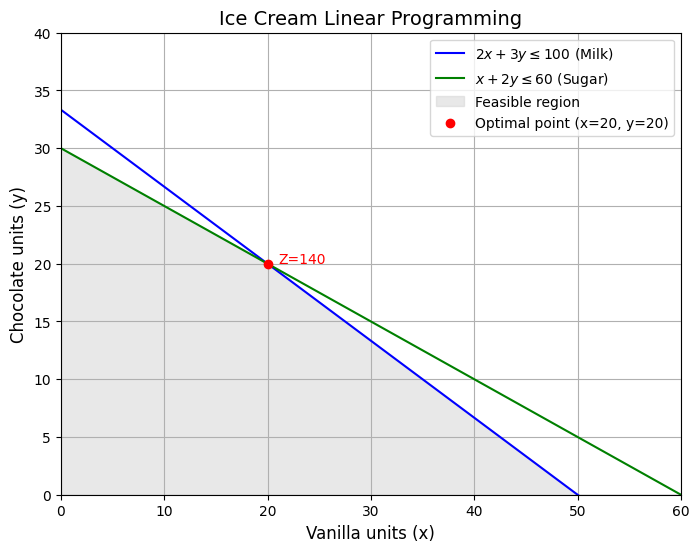

In [12]:
# Constraints coefficients
x_vals = np.linspace(0, 60, 200)
y_milk = (100 - 2*x_vals) / 3
y_sugar = (60 - x_vals) / 2

# Feasible region mask
y_feasible = np.minimum(y_milk, y_sugar)
y_feasible[y_feasible < 0] = 0

# Optimal point
x_opt, y_opt = 20, 20
z_opt = 3*x_opt + 4*y_opt

# Plot
plt.figure(figsize=(8,6))
plt.plot(x_vals, y_milk, label=r'$2x + 3y \leq 100$ (Milk)', color='blue')
plt.plot(x_vals, y_sugar, label=r'$x + 2y \leq 60$ (Sugar)', color='green')
plt.fill_between(x_vals, 0, y_feasible, color='lightgray', alpha=0.5, label='Feasible region')

# Optimal point
plt.scatter(x_opt, y_opt, color='red', zorder=5, label=f'Optimal point (x={x_opt}, y={y_opt})')
plt.text(x_opt+1, y_opt, f'Z={z_opt}', color='red')

plt.xlim(0, 60)
plt.ylim(0, 40)
plt.xlabel('Vanilla units (x)', fontsize=12)
plt.ylabel('Chocolate units (y)', fontsize=12)
plt.title('Ice Cream Linear Programming', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


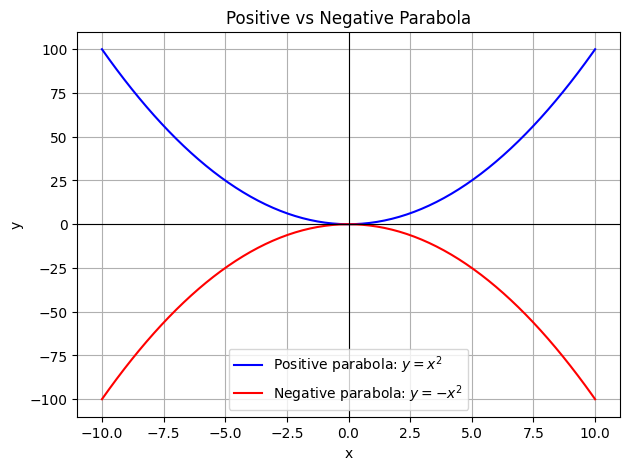

In [2]:
# Create x values
x = np.linspace(-10, 10, 200)

# Positive parabola (minimum at vertex)
y_pos = x**2

# Negative parabola (maximum at vertex)
y_neg = -x**2

# Plot
plt.figure(figsize=(7, 5))
plt.plot(x, y_pos, label='Positive parabola: $y = x^2$', color='blue')
plt.plot(x, y_neg, label='Negative parabola: $y = -x^2$', color='red')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Positive vs Negative Parabola')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
